# OKCupid Date-A-Scientist Final Portfolio Project 

***

## Codecademy Data Science Path

This is the final portfolio project for the Machine Learning Path of CodeCademy's Data Science Course. The objective of this project is to gather all the skills and knowledge deveolped during the course to analyze and come up with predictive models based on a large number of different profiles for a ficticious date match app.

Based on an initial data analysis some questions will be formulated, which we shall try to answer in the following sections of this work.

***

## 1) Load and Check Data - Understanding Data before Formulating Questions

In [1]:
# Import Main Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data File (.csv) and Transform to DafaFrame
raw_data = pd.read_csv('profiles.csv')

In [3]:
# Inspecting first few rows
raw_data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
# Data Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
# Summary Statistics for Numerical Variables
raw_data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [6]:
# Summary Statistics for Categorical Variables
raw_data.describe(include = 'object')

,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,54650,35551,56961,45866,53318,54458,52374,50308,48470,49409,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,12,18,6,3,32,54350,51516,48635,43533,49260,...,199,15,3,15,45,2,48,5,7647,5
top,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,ask me,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,14652,16585,41780,37724,23959,12,61,82,529,16,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697


***

## 2) Formulating Questions

### Main questions / predictions - Initial thoughts:

#### Questions:
* Are religion and ethnicity important factors in determining marital status or engagement? 
* Can we come up with a model for determining marital status based on these and some other variables?
* How strong is the correlation between education and income among those groups?
* Do the average income among different groups of jobs vary?
* Can we come up with a robust model to predict outcome based on education, job and other variables?

#### Prediction Models:
* Predict Income based on Education, Job, Location and Age  - Regression Problem
* Alternate Regression Problem - Predict Age based Drugs, Drinks, Smokes, Status, OffSpring
* Predict Relationship Status (Availability) based on Age, Religion , Ethnicity, Orientation, Sex, Drugs, Pets - Classification Problem

***

## 3) Further Inspecting Data - Cleaning and Tidying

***

### Age 

In [7]:
### Filtering relevant data for answering chosen questions
data = raw_data[['age','income','education','status', 'ethnicity','religion','orientation', 'location','job', 'drugs', 'drinks','sex','offspring', 'smokes','pets']]

In [8]:
### Describing Age Variable - Numerical
data['age'].describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

In [9]:
### Age filter
data = data[data['age'] < 100]

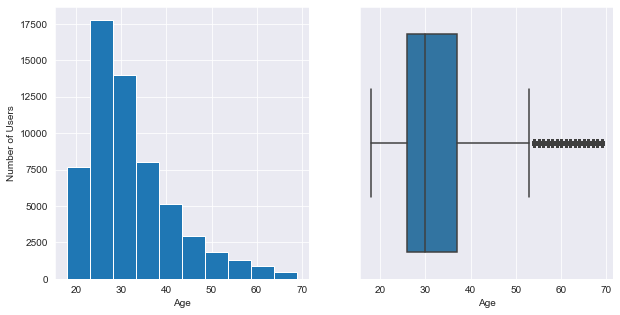

In [10]:
sns.color_palette("mako", as_cmap=True)
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')
ax = plt.subplot(1,2,1)
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Number of Users')
ax = plt.subplot(1,2,2)
sns.boxplot(x = 'age', data  = data)
plt.xlabel('Age')
plt.show()

<div class="alert alert-block alert-warning">
Age variable is consistent and does not need cleaning, only filtering for extreme outliers. Later it will be standardized for the models that demand this procedure (the distribution is right skewed).
</div>

***

### Income

In [11]:
### Describing Income Variable - Numerical (needs further cleaning and boxing)
data['income'].describe()

count      59944.000000
mean       20033.890965
std        97347.747284
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

<div class="alert alert-block alert-warning">
Income variable needs cleaning (filtering), there is a lot of missing (-1.00000) values and outliers.
</div>

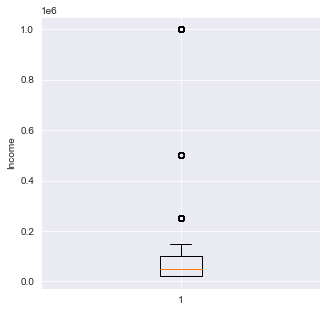

count      59944.000000
mean       20033.890965
std        97347.747284
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

In [12]:
# Data will be split between different groups according to the problem. Data_2 refers to the second problem (predicting outcome)
data_1 = data[data['income'] > 0] 
plt.figure(figsize = (5,5))
ax = plt.boxplot(data_1['income'])
plt.ylabel('Income')
plt.show()
data['income'].describe()

C:\Users\rafab\AppData\Local\Temp/ipykernel_15740/1151149693.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_1 = data_1[(data['income'] <= 200000)]


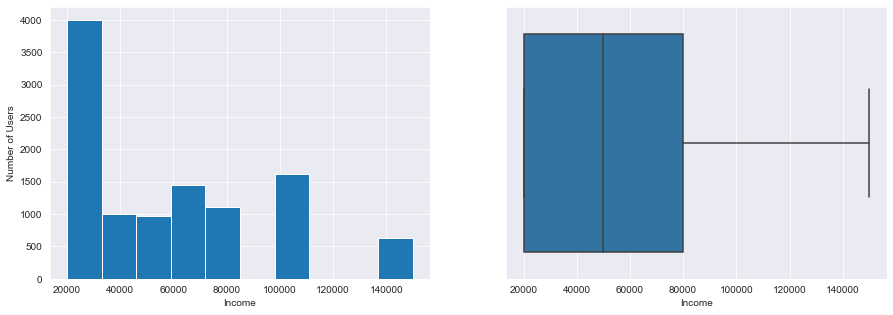

In [13]:
### Filtering income for outliers 
data_1 = data_1[(data['income'] <= 200000)]
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(data_1['income'])
plt.xlabel('Income')
plt.ylabel('Number of Users')
plt.subplot(1,2,2)
sns.boxplot(x = 'income', data = data_1)
plt.xlabel('Income')
plt.show()

<div class="alert alert-block alert-warning">
The distribution is right-skewed.
</div>

***

### Education

In [14]:
### Describing Education Variable - Categorical Ordinal (5 levels)
data['education'].value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1682
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

<div class="alert alert-block alert-warning">
Education will be transformed in a 5-level, ordinal categorical variable.
</div>

Text(0, 0.5, 'Number of Users')

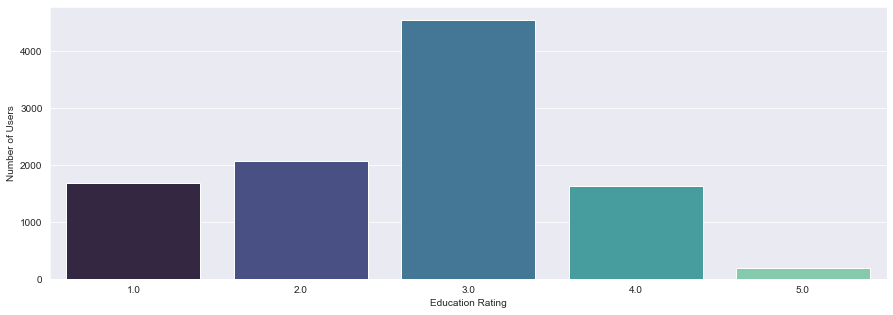

In [15]:
rating_edu = {'graduated from college/university': 3, 'graduated from masters program': 4, 'working on college/university': 2, 'graduated from high school': 1, 'graduated from two-year college': 2, 'working on two-year college': 1, 'dropped out of college/university': 1, 'working on masters program': 3, 'graduated from ph.d program': 5, 'working on ph.d program': 4, 'graduated from space camp': 2, 'graduated from law school': 3, 'college/university': 3, 'dropped out of space camp': 1, 'working on space camp': 1, 'dropped out of two-year college': 1, 'two-year college': 2, 'dropped out of high school': 1, 'dropped out of masters program': 3,'high school': 1, 'graduated from med school':3, 'working on med school': 2, 'dropped out of ph.d program': 4, 'working on high school': 1, 'working on law school': 2, 'masters program': 3, 'space camp': 1, 'dropped out of med school': 2, 'ph.d program': 4, 'dropped out of law school': 2, 'law school': 3}
data_1['education'] = data_1['education'].map(rating_edu)
plt.figure(figsize = (15,5))
sns.countplot(data = data_1, x = 'education', palette = 'mako')
plt.xlabel('Education Rating')
plt.ylabel('Number of Users')

### Location

In [16]:
### Describing Location Variable - Categorical Nominal (will be further reduced to 3 labels: coastal US, countryside US, Foreign)
data['location'].value_counts()

san francisco, california         31063
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: location, Length: 199, dtype: int64

In [17]:
### Separating by regions
data['location'] = data['location'].apply(lambda x: str(x).split(' ')[-1])
data['location'].value_counts()

california       59853
york                17
illinois             8
massachusetts        5
michigan             4
texas                4
oregon               4
florida              3
arizona              3
virginia             3
washington           2
utah                 2
kingdom              2
georgia              2
minnesota            2
columbia             2
colorado             2
ohio                 2
spain                2
hawaii               2
louisiana            1
island               1
mexico               1
switzerland          1
netherlands          1
pennsylvania         1
germany              1
missouri             1
canada               1
tennessee            1
carolina             1
connecticut          1
montana              1
wisconsin            1
nevada               1
vietnam              1
jersey               1
mississippi          1
ireland              1
idaho                1
Name: location, dtype: int64

<div class="alert alert-block alert-warning">
The overwhelming majority of user location is in California. This feature will no longer be considered, since it does not provide significant information gain (variance).
</div>

***

### Status

In [18]:
### Describing Status Variable - Categorical Nominal to Boolean (Available - Not-Available)
data['status'].value_counts()

single            55696
seeing someone     2064
available          1864
married             310
unknown              10
Name: status, dtype: int64

Text(0, 0.5, 'Number of Users')

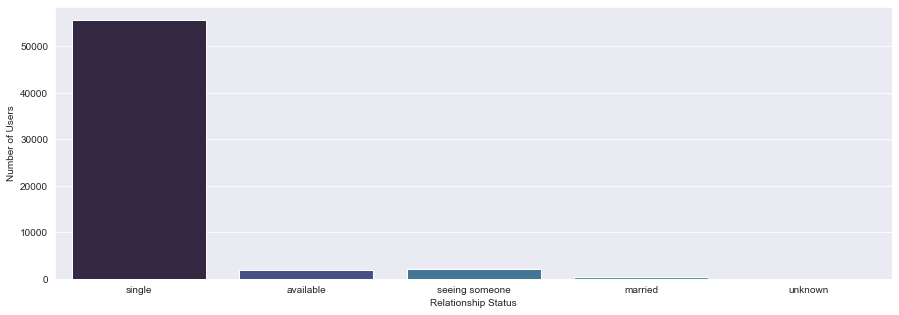

In [19]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'status', palette = 'mako')
plt.xlabel('Relationship Status')
plt.ylabel('Number of Users')

<div class="alert alert-block alert-warning">
Classes are highly unbalanced.
</div>

***

### Ethnicity

In [20]:
### Describing Ethnicity Variable - Categorical Nominal (will be further reduced in number of categories to only those signaled as single category)
data['ethnicity'].value_counts()

white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: ethnicity, Length: 217, dtype: int64

<div class="alert alert-block alert-warning">
Only the first most frequent (and single ethnicity) labels will be taken into account (white, asian, hispanic / latin and black). Although ethnicity is a broad subject, in the sake of simplicity the study will focus on the most representative ones, because the diversity is so big. Other ethnicities will be placed in 'other' category. I apologize for that, knowing it will have a bias on the analysis.
</div>

Text(0, 0.5, 'Number of Users')

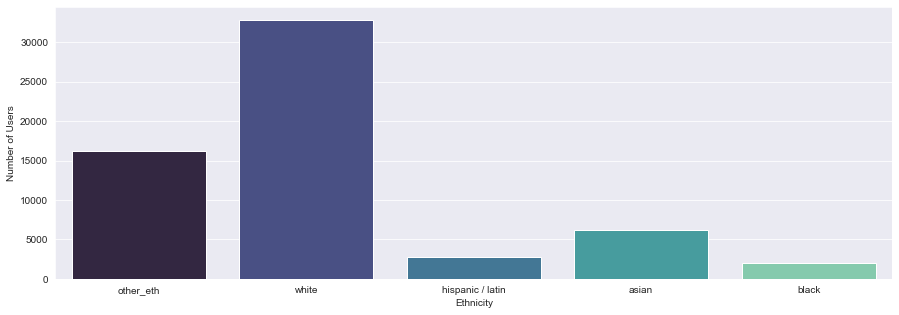

In [21]:
data['ethnicity'] = data['ethnicity'].apply(lambda x: 'other_eth' if ((x != 'white') & (x != 'asian') & (x != 'hispanic / latin') & (x != 'black')) else x)
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'ethnicity', palette = 'mako')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Users')

<div class="alert alert-block alert-warning">
The analysis will have a bias towards white people because of the larger number representing this specific ethnicity.
</div>

***

### Religion

In [22]:
### Describing Religion Variable - Categorical Nominal  (will be reduced initially to only the following categories: agnosticism/atheism/other - catholicism - judaism - chistianity - islam - buddhism - hinduism)
data['religion'].value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            845
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

Text(0, 0.5, 'Number of Users')

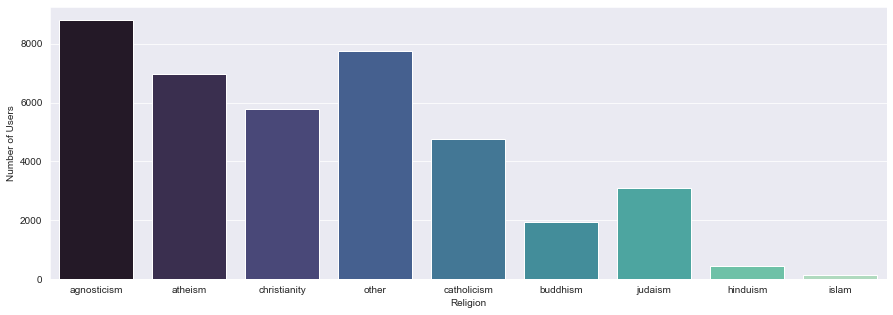

In [23]:
### String stripping - extracting religion
data['religion'] = data['religion'].apply(lambda x: str(x).split(' ')[0])
data = data.drop(data[data['religion'] == 'nan'].index)
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'religion', palette = 'mako')
plt.xlabel('Religion')
plt.ylabel('Number of Users')

***

### Job

In [24]:
### Describing Job Variable - Categorical Nominal (will be reduced to 4 categories: STEM for Science, Tech, Engineering and Math, Health for Health Sciences, Humanities for Business, Arts, Law and Human Sciences in General,  Education for Education, Student and Other)
data['job'].value_counts()

other                                5394
student                              3527
computer / hardware / software       3510
science / tech / engineering         3362
artistic / musical / writer          3168
sales / marketing / biz dev          2890
medicine / health                    2603
education / academia                 2480
executive / management               1634
entertainment / media                1557
banking / financial / real estate    1414
law / legal services                  957
hospitality / travel                  913
construction / craftsmanship          699
clerical / administrative             603
political / government                526
rather not say                        317
transportation                        271
unemployed                            227
retired                               207
military                              154
Name: job, dtype: int64

Text(0, 0.5, 'Number of Users')

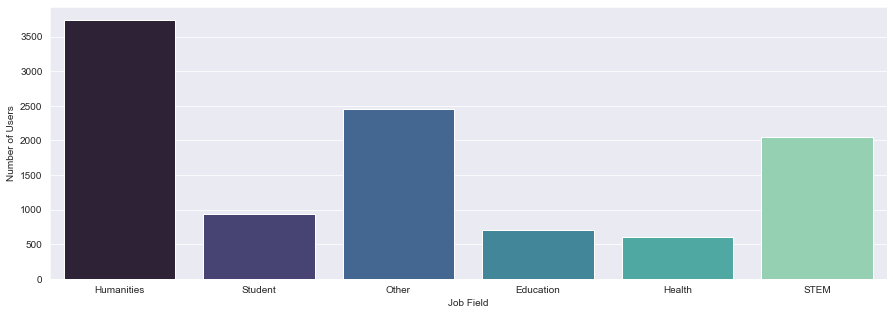

In [25]:
### Dividing jobs in field of study groups
job_grouping = {'other': 'Other', 'student': 'Student', 'science / tech / engineering': 'STEM', 'computer / hardware / software': 'STEM', 'artistic / musical / writer': 'Humanities', 'sales / marketing / biz dev': 'Humanities', 'medicine / health': 'Health', 'education / academia': 'Education', 'executive / management': 'Humanities', 'banking / financial / real estate': 'Humanities', 'entertainment / media': 'Humanities',  'law / legal services': 'Humanities', 'hospitality / travel': 'Humanities',  'construction / craftsmanship': 'Other', 'clerical / administrative': 'Other', 'political / government': 'Humanities', 'rather not say': 'Other', 'transportation': 'Other', 'unemployed': 'Other', 'retired': 'Other', 'military': 'Other'}
data_1['job'] = data_1['job'].map(job_grouping)
plt.figure(figsize = (15,5))
sns.countplot(data = data_1, x = 'job', palette = 'mako')
plt.xlabel('Job Field')
plt.ylabel('Number of Users')

***

### Drugs

In [26]:
# Describing Drugs variable - Categorical Nominal to be transformed to Categorical Ordinal
data['drugs'].value_counts(dropna = False)

never        25166
NaN           8389
sometimes     5860
often          304
Name: drugs, dtype: int64

In [27]:
data['drugs'].value_counts()

never        25166
sometimes     5860
often          304
Name: drugs, dtype: int64

Text(0, 0.5, 'Number of Users')

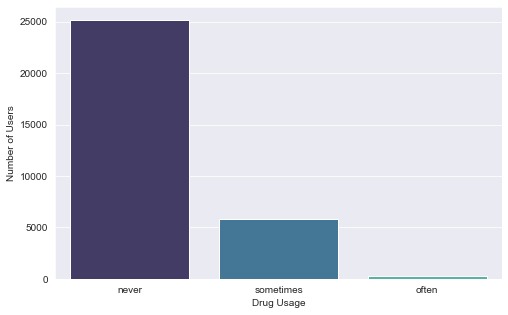

In [28]:
plt.figure(figsize = (8,5))
sns.countplot(data = data, x = 'drugs', palette = 'mako')
plt.xlabel('Drug Usage')
plt.ylabel('Number of Users')

***

### Smokes

In [29]:
data['smokes'].value_counts(dropna = False)

no                30046
sometimes          2645
NaN                2219
when drinking      2127
yes                1583
trying to quit     1099
Name: smokes, dtype: int64

Text(0, 0.5, 'Number of Users')

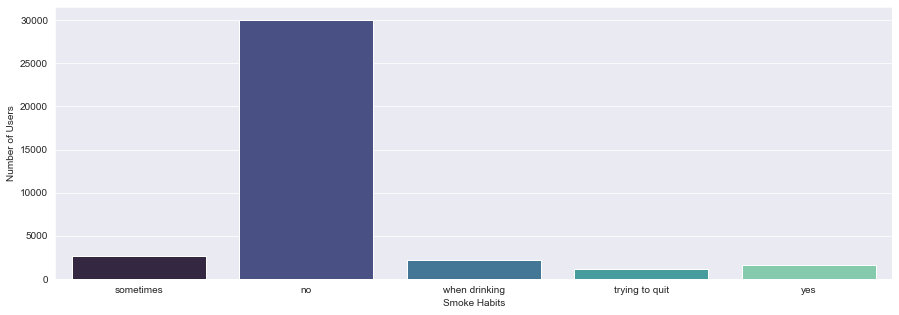

In [30]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'smokes', palette = 'mako')
plt.xlabel('Smoke Habits')
plt.ylabel('Number of Users')

***

### Drinks

In [31]:
data['drinks'].value_counts(dropna = False)

socially       27619
rarely          4419
often           3606
not at all      2501
NaN              990
very often       342
desperately      242
Name: drinks, dtype: int64

Text(0, 0.5, 'Number of Users')

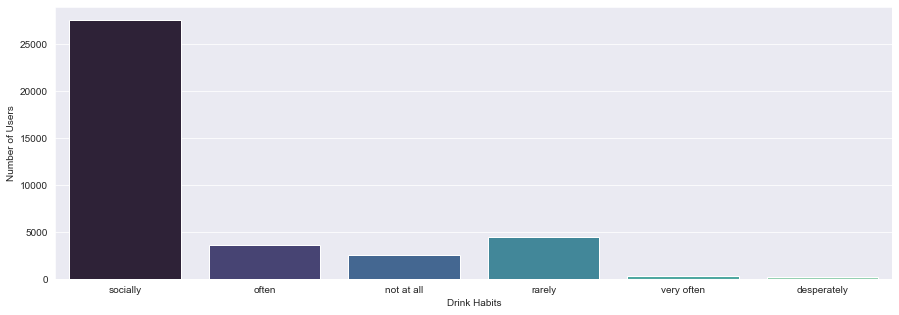

In [32]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'drinks', palette = 'mako')
plt.xlabel('Drink Habits')
plt.ylabel('Number of Users')

***

### Offspring

In [33]:
data['offspring'].value_counts(dropna = False)

NaN                                                    21757
doesn&rsquo;t have kids                                 4893
doesn&rsquo;t have kids, but might want them            2949
doesn&rsquo;t have kids, but wants them                 2633
doesn&rsquo;t want kids                                 2417
has kids                                                1473
has a kid                                               1438
doesn&rsquo;t have kids, and doesn&rsquo;t want any      960
has kids, but doesn&rsquo;t want more                    366
has a kid, but doesn&rsquo;t want more                   210
has a kid, and might want more                           171
wants kids                                               162
might want kids                                          120
has kids, and might want more                             94
has a kid, and wants more                                 58
has kids, and wants more                                  18
Name: offspring, dtype: 

***

### Orientation

In [34]:
data['orientation'].value_counts()

straight    34025
gay          3623
bisexual     2071
Name: orientation, dtype: int64

Text(0, 0.5, 'Number of Users')

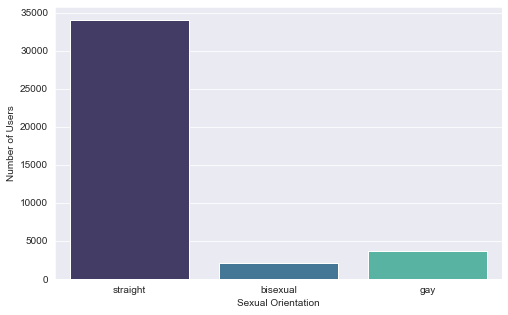

In [35]:
plt.figure(figsize = (8,5))
sns.countplot(data = data, x = 'orientation', palette = 'mako')
plt.xlabel('Sexual Orientation')
plt.ylabel('Number of Users')

***

### Pets

In [36]:
data['pets'].value_counts()

likes dogs and likes cats          11221
likes dogs                          4784
likes dogs and has cats             3349
has dogs                            2587
has dogs and likes cats             1770
likes dogs and dislikes cats        1571
has dogs and has cats               1109
has cats                             989
likes cats                           830
has dogs and dislikes cats           444
dislikes dogs and likes cats         212
dislikes dogs and dislikes cats      163
dislikes cats                         84
dislikes dogs and has cats            72
dislikes dogs                         37
Name: pets, dtype: int64

Text(0, 0.5, 'Number of Users')

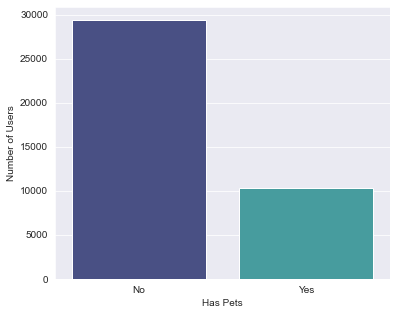

In [37]:
# Restricting values to 2 categories: Have and Don't Have
data['pets'] = data['pets'].apply(lambda x: 'Yes' if 'has' in str(x).strip(' ') else 'No')
data['pets'].value_counts()
plt.figure(figsize = (6,5))
sns.countplot(data = data, x = 'pets', palette = 'mako')
plt.xlabel('Has Pets')
plt.ylabel('Number of Users')

## 4) Exploratory Data Analysis - Diving Deeper

***

### Problem 1: Predicting Income

In [38]:
### Data Groups - one for each problem front
### DataSet for Problem 1: Predicting Income
data_1 = data_1[['income','age','education','job']].reset_index(drop = True)
data_1.head()

,income,age,education,job
0,80000,35,1.0,Humanities
1,20000,23,2.0,Student
2,40000,28,3.0,Humanities
3,30000,30,1.0,Humanities
4,50000,29,2.0,Other


<Figure size 864x864 with 0 Axes>

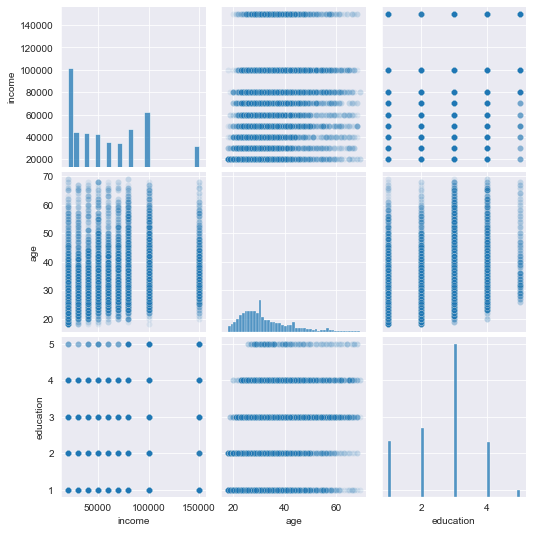

In [39]:
plt.figure(figsize = (12,12))
sns.pairplot(data_1[['income','age','education']], kind="scatter", plot_kws=dict(alpha=0.1))

Comments: from the data as it is, it's clear that a clear correlation doesn't show up between the numerical variables chosen. Let's try a different approach, averaging the income among age and job groups.

In [40]:
bins = [18,25,35,50,80]
labels = ['teenager','young adult','adult','senior']
data_1['age_bin'] = pd.cut(x = data_1['age'], bins = bins, labels = labels, include_lowest = True)
print(data_1.head())
data_inc_avg = data_1.groupby(['age_bin']).mean().reset_index()
print(data_inc_avg)

   income  age  education         job      age_bin
0   80000   35        1.0  Humanities  young adult
1   20000   23        2.0     Student     teenager
2   40000   28        3.0  Humanities  young adult
3   30000   30        1.0  Humanities  young adult
4   50000   29        2.0       Other  young adult
       age_bin        income        age  education
0     teenager  34203.539823  22.792035   2.124511
1  young adult  59189.523613  29.816663   2.788398
2        adult  74723.438122  41.369678   2.916738
3       senior  71853.932584  57.553371   2.988235


Text(0, 0.5, 'Income')

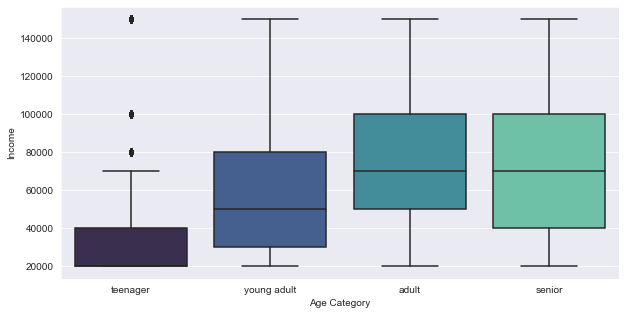

In [41]:
plt.figure(figsize = (10,5))
sns.boxplot(data = data_1, x = 'age_bin', y = 'income', palette = 'mako')
plt.xlabel('Age Category')
plt.ylabel('Income')

<div class="alert alert-block alert-warning">
There is a clear tendency in average income being proportional to age (which is logical) up to the third category (adults), and stagnating from there on.
</div>

In [42]:
### Now were are doing a similar analysis, but based on job groups
data_inc_job = data_1.groupby(['job']).mean()
print(data_inc_job)

                  income        age  education
job                                           
Education   47669.491525  35.833333   3.333809
Health      60458.265139  35.775777   2.881119
Humanities  62218.658113  33.091419   2.701874
Other       43573.463573  32.814001   2.239362
STEM        82558.593750  32.990234   3.006166
Student     22951.871658  24.704813   2.174725


Text(0, 0.5, 'Income')

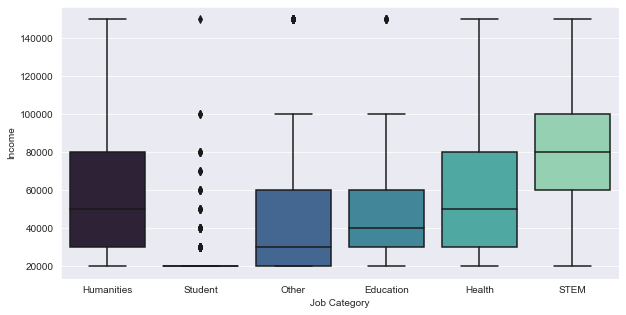

In [43]:
plt.figure(figsize = (10,5))
sns.boxplot(data = data_1, x = 'job', y = 'income', palette = 'mako')
plt.xlabel('Job Category')
plt.ylabel('Income')

<div class="alert alert-block alert-warning">
    The boxplots show consistency (despite some outliers, mainly in the student category which are clearly fakes). STEM jobs have the highest incomes, followed by health and humanities professionals. Education and Other categories are clearly underpaid (compared to the previously mentioned ones). A decision was made to withdraw the student category because of the numerous outliers (students generally don't have proper income, at least high school ones).
</div>

In [44]:
### Droping student's category for jobs
data_1 = data_1[data_1['job'] != 'Student']

Now we will transform the binned age variable into a categorical ordinal one, and transform job categories using one-hot encoding, to better see tendencies and prepare data for Machine Learning Models (data will be standardized).

In [45]:
### Transforming Job into Categorical One-Hot Encoded variable
data_1_eda = data_1
ohe_job = pd.get_dummies(data_1_eda['job'])
data_1_eda = data_1_eda.join(ohe_job)
print(data_1_eda.head())

   income  age  education         job      age_bin  Education  Health  \
0   80000   35        1.0  Humanities  young adult          0       0   
2   40000   28        3.0  Humanities  young adult          0       0   
3   30000   30        1.0  Humanities  young adult          0       0   
4   50000   29        2.0       Other  young adult          0       0   
5   60000   40        3.0       Other        adult          0       0   

   Humanities  Other  STEM  
0           1      0     0  
2           1      0     0  
3           1      0     0  
4           0      1     0  
5           0      1     0  


In [46]:
### Filtering column and renaming
data_1_eda = data_1_eda[['income','age','education','Education','Health','Humanities','Other','STEM']]
data_1_eda.columns = ['income','age','education','job_education','job_health','job_human','job_other','job_stem']
print(data_1_eda.head())

   income  age  education  job_education  job_health  job_human  job_other  \
0   80000   35        1.0              0           0          1          0   
2   40000   28        3.0              0           0          1          0   
3   30000   30        1.0              0           0          1          0   
4   50000   29        2.0              0           0          0          1   
5   60000   40        3.0              0           0          0          1   

   job_stem  
0         0  
2         0  
3         0  
4         0  
5         0  


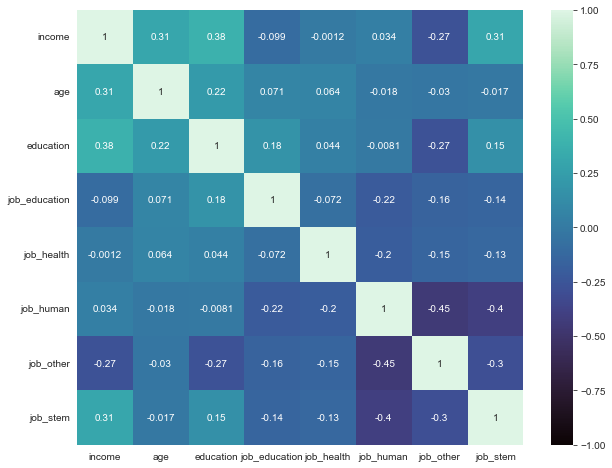

In [47]:
plt.figure(figsize = (10,8))
data_corr = data_1_eda.corr()
corrplot = sns.heatmap(data_corr, vmin = -1, vmax = 1, cmap = 'mako', annot = True)

<div class="alert alert-block alert-warning">
    Age, Education and Job (mainly STEM and Other categories) show a small amount of correlation with income, between 0.3 and 0.4. 
</div>

In [48]:
data_1['job'] = data_1['job'].apply(lambda x: 'Pool' if (x != 'STEM') else 'STEM')

In [49]:
data_1['job'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Pool
2        Pool
3        Pool
4        Pool
5        Pool
         ... 
10781    Pool
10782    Pool
10783    Pool
10784    Pool
10785    Pool
Name: job, Length: 9851, dtype: object>

In [50]:
data_income = data_1[['income','age','education','job']].reset_index()
ohe_job_final = pd.get_dummies(data_income['job'])
data_income = data_income.join(ohe_job_final)
data_income = data_income[['income','age','education','STEM']]
data_income.columns = ['income','age','education','job_stem']
print(data_income.head())

   income  age  education  job_stem
0   80000   35        1.0         0
1   40000   28        3.0         0
2   30000   30        1.0         0
3   50000   29        2.0         0
4   60000   40        3.0         0


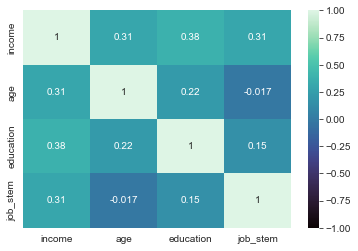

In [51]:
data_corr_income = data_income.corr()
plt.figure(figsize = (6,4))
corrplot = sns.heatmap(data_corr_income, vmin = -1, vmax = 1, cmap = 'mako', annot = True)

<div class="alert alert-block alert-warning">
    The problem is now reduced to the variables most correlated with the outcome (which is income), but the correlation values are not strong enough to proceed with model fitting and predcting. Another regression problem will be considered in lieu of this one.
</div>

***

### Alternate Regression Problem: Predicting Age

<div class="alert alert-block alert-warning">
    Some data transformations will be applied to data in order to prepare it for numerical regression.
</div>

In [52]:
### Selecting Data
data_alt = data[['age','status','drugs','drinks','offspring', 'smokes','orientation','income']]
data_alt = data_alt[data_alt['status'] != 'unknown'].reset_index(drop = True)
data_alt.head()

,age,status,drugs,drinks,offspring,smokes,orientation,income
0,22,single,never,socially,"doesn&rsquo;t have kids, but might want them",sometimes,straight,-1
1,35,single,sometimes,often,"doesn&rsquo;t have kids, but might want them",no,straight,80000
2,29,single,NaN,socially,"doesn&rsquo;t have kids, but might want them",no,straight,-1
3,31,single,never,socially,"doesn&rsquo;t have kids, but wants them",no,straight,-1
4,24,single,NaN,socially,doesn&rsquo;t have kids,when drinking,straight,-1


In [53]:
data_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39714 entries, 0 to 39713
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          39714 non-null  int64 
 1   status       39714 non-null  object
 2   drugs        31326 non-null  object
 3   drinks       38724 non-null  object
 4   offspring    17960 non-null  object
 5   smokes       37495 non-null  object
 6   orientation  39714 non-null  object
 7   income       39714 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [54]:
# Cleaning and Windowing Income, Droping NaNs
data_alt = data_alt[(data_alt['income'] > 0) & (data_alt['income'] < 200000)]
data_alt = data_alt.dropna()
data_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733 entries, 1 to 39711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          3733 non-null   int64 
 1   status       3733 non-null   object
 2   drugs        3733 non-null   object
 3   drinks       3733 non-null   object
 4   offspring    3733 non-null   object
 5   smokes       3733 non-null   object
 6   orientation  3733 non-null   object
 7   income       3733 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 262.5+ KB


In [55]:
# Status to Categorical Ordinal according to Availability
status_rating = {'married': 0, 'seeing someone': 1, 'available': 2, 'single': 3}
data_alt['status'] = data_alt['status'].map(status_rating)

In [56]:
# Drinks to Drink Frequency
drug_rating = {'never': 0, 'sometimes': 1, 'often': 2}
data_alt['drugs'] = data_alt['drugs'].map(drug_rating).astype('float')

In [57]:
# Drinks to Drink Frequency
drink_rating = {'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}
data_alt['drinks'] = data_alt['drinks'].map(drink_rating).astype('float')

In [58]:
# Smokes to Smoke Frequency
smoke_rating = {'no': 0, 'sometimes': 1, 'when drinking': 2, 'trying to quit': 3, 'yes': 4}
data_alt['smokes'] = data_alt['smokes'].map(smoke_rating).astype('float')

In [59]:
# Offspring - Translating info to a pertinent scale (according to author's view) - This variable will be split into two (has/dan't have kids and want kids scale)
data_alt['offspring_status'] = data_alt['offspring'].apply(lambda x: str(x).replace('has', 'Yes') if str(x) in ['has'] else str(x).replace('doesn&rsquo;t','Nope'))
data_alt['offspring_has'] = data_alt['offspring_status'].apply(lambda x: 1 if 'has a' in str(x)  else 2 if 'has kids' in str(x) else 0)
data_alt['offspring_wants'] = data_alt['offspring_status'].apply(lambda x: 0 if 'Nope want' in str(x) else 2 if 'wants' in str(x) else 1)
print(data_alt['offspring_status'].value_counts())
print(data_alt['offspring_has'].value_counts())
print(data_alt['offspring_wants'].value_counts())

Nope have kids                         678
Nope have kids, but might want them    672
Nope want kids                         626
Nope have kids, but wants them         539
has kids                               338
has a kid                              326
Nope have kids, and Nope want any      241
has kids, but Nope want more            93
has a kid, and might want more          63
has a kid, but Nope want more           52
wants kids                              29
might want kids                         28
has kids, and might want more           23
has a kid, and wants more               18
has kids, and wants more                 7
Name: offspring_status, dtype: int64
0    2813
2     461
1     459
Name: offspring_has, dtype: int64
1    2128
0    1012
2     593
Name: offspring_wants, dtype: int64


<div class="alert alert-block alert-warning">
    Data regarding offspring was divided in two with 3 levels each:
    1) Has kids: 0 for no kids, 1 for 1 kid and 2 for 2 kids
    2) Wants kids: 0 for doesn't want, 1 for might want and 2 for wants
</div>

In [60]:
# Orientation to Boolean Category (Bissexual or Not - maybe the tendency to assume bissexuality is much bigger in younger ages)
data_alt['orientation'] = data_alt['orientation'].apply(lambda x: 1 if str(x) == 'bisexual' else 0)
data_alt['orientation'].value_counts()

0    3513
1     220
Name: orientation, dtype: int64

In [61]:
# Age Binning (decades)
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29','30-39','40-49','50-59','60-69']
data_alt['age_bin'] = pd.cut(x = data_alt['age'], bins = bins, labels = labels, include_lowest = True)
data_alt['age_bin'].value_counts()

18-29    1786
30-39     944
40-49     557
50-59     317
60-69     129
Name: age_bin, dtype: int64

<Figure size 720x720 with 0 Axes>

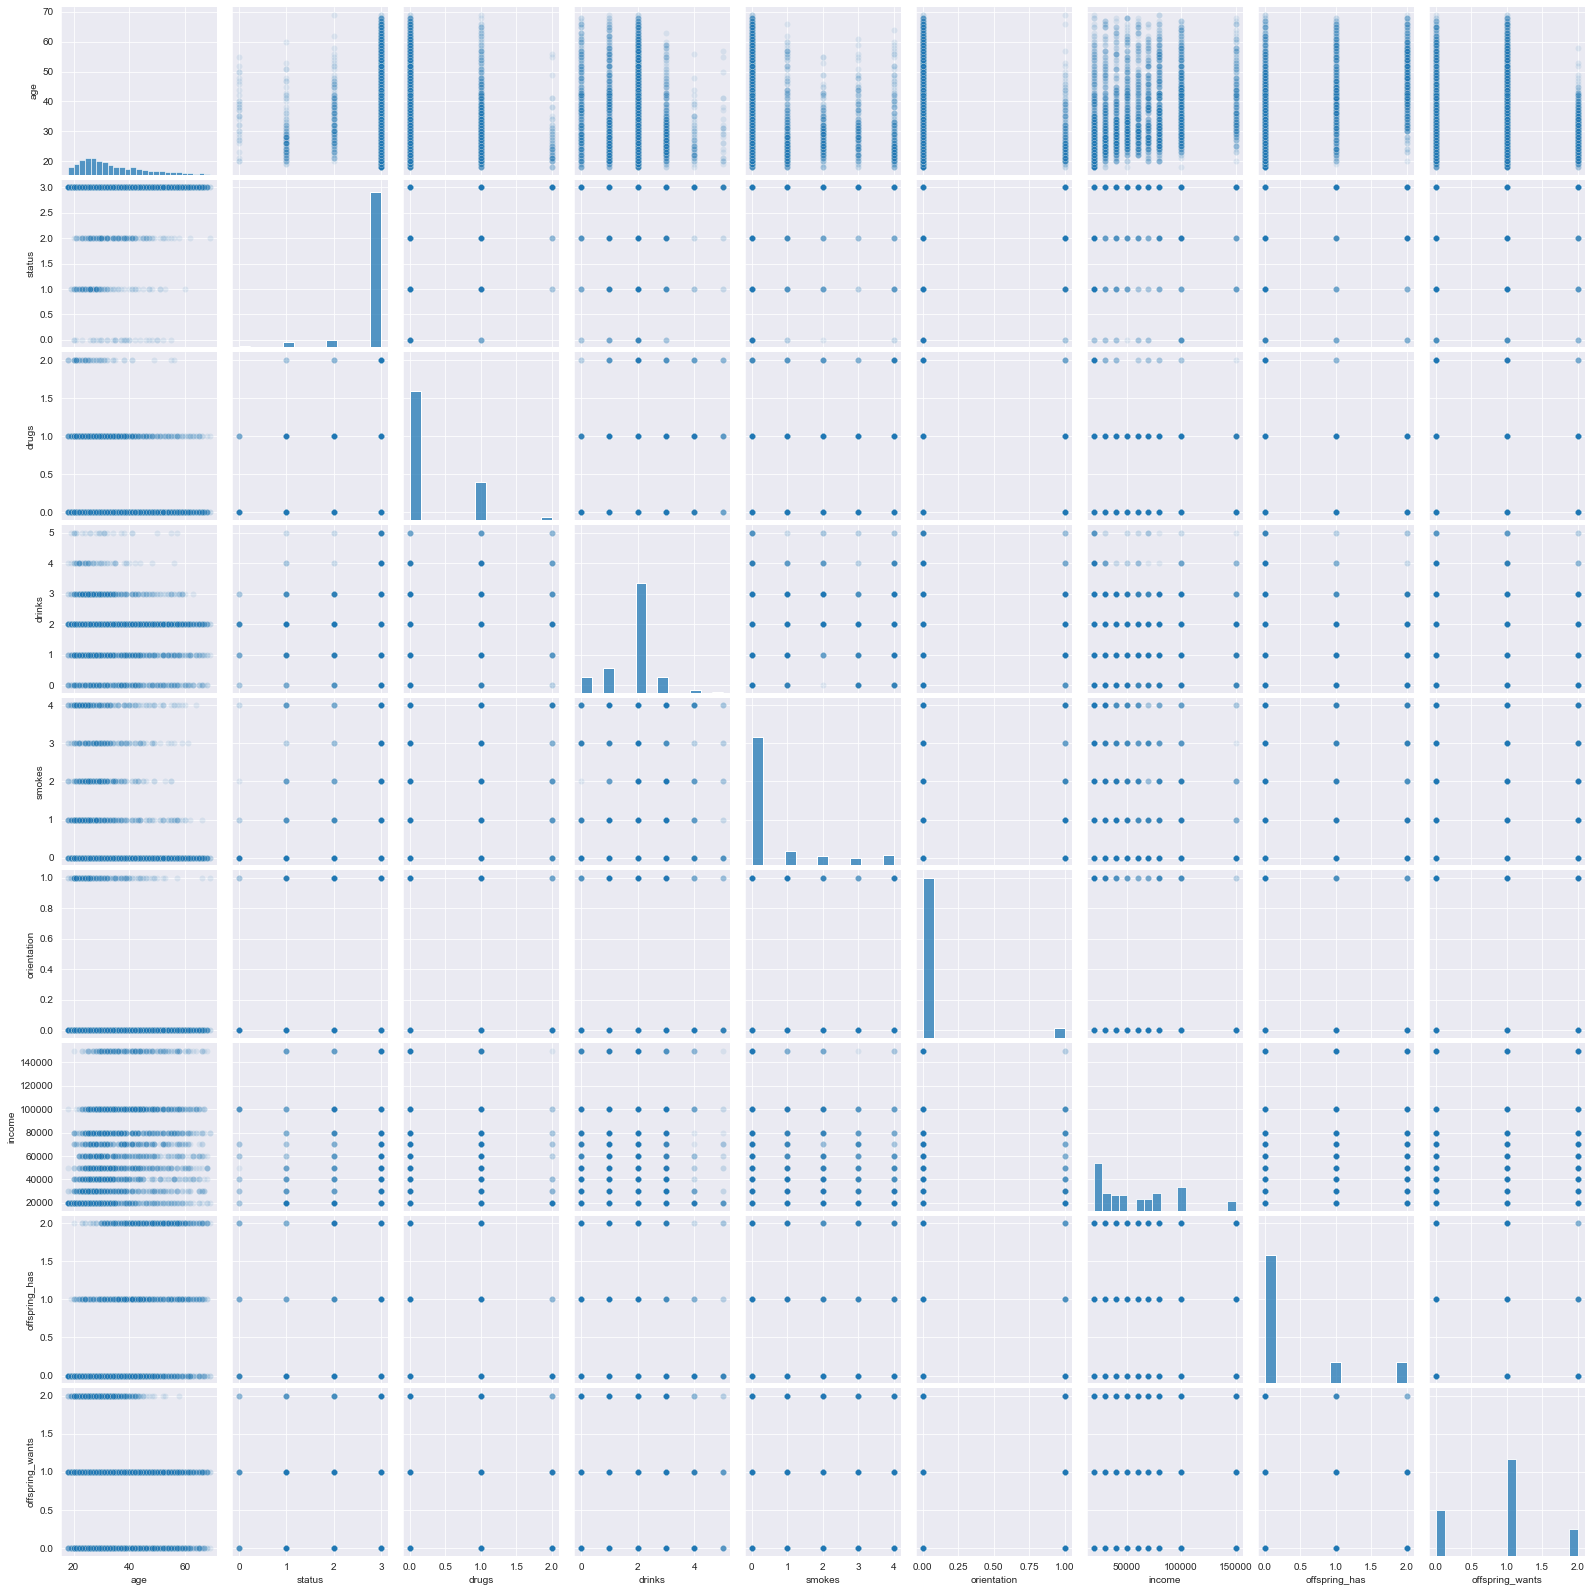

In [62]:
# Inspecting Correlations to Help Select Features
plt.figure(figsize = (10,10))
sns.pairplot(data_alt, kind="scatter", plot_kws=dict(alpha=0.1))

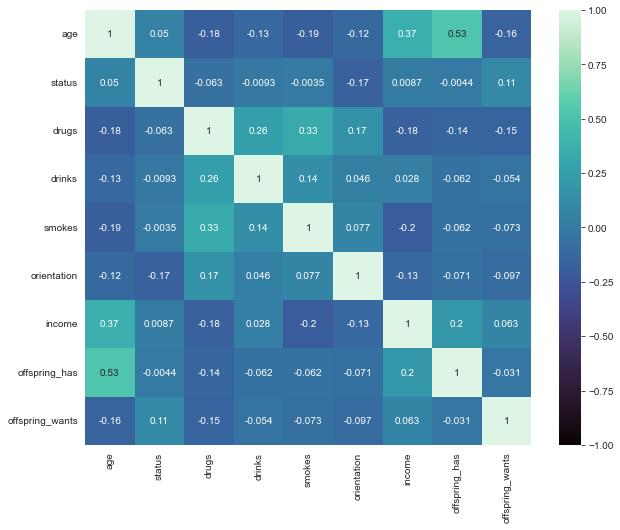

In [63]:
data_corr = data_alt.corr()
plt.figure(figsize = (10,8))
corrplot = sns.heatmap(data_corr, vmin = -1, vmax = 1, cmap = 'mako', annot = True)

<div class="alert alert-block alert-warning">
    The only variables that have shown potential (individually) for linear model application right away is offspring_has (has children) and income, with 0.55 and 0.37 correlation coefficients, respectively, although mutual correlation between these variables is not small. There are some other variables with small correlation, that may add to enriching the model.
    For example, smokes has a -0.19 coefficient against age but only -0.092 correlation with offspring_has.
    Offspring_wants as well, with a -0.18 correlation with age but only -0.078 correlation with offspring_has.
    Drinks similarly, with -0.12 and -0.072 respectively.
    Drugs as well.
</div>

***

### Problem 2: Classifying Status 

<div class="alert alert-block alert-warning">
Now we turn our attention to the problem of classifying the relationshio status of a person based on some chosen variables. But first, data will be further cleaned, transformed and better categorized for the task.
</div>

In [64]:
### DataSet for Problem 2: Predicting Availability based on chosen variables
data_2 = data[['status','age','religion','ethnicity','orientation','drugs', 'sex','pets']].dropna()
data_2 = data_2[data_2['status'] != 'unknown'].reset_index(drop = True)

In [65]:
### Checking current dataframe status
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31326 entries, 0 to 31325
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       31326 non-null  object
 1   age          31326 non-null  int64 
 2   religion     31326 non-null  object
 3   ethnicity    31326 non-null  object
 4   orientation  31326 non-null  object
 5   drugs        31326 non-null  object
 6   sex          31326 non-null  object
 7   pets         31326 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [66]:
data_2['status'].value_counts()

single            28866
seeing someone     1201
available          1054
married             205
Name: status, dtype: int64

In [67]:
# Transforming Status to Binary Classification (available (Yes) / not-available (No))
data_2['available'] = data_2['status'].apply(lambda x: 'No' if x in ['married','seeing someone'] else 'Yes')

In [68]:
# Binning age variable
bins = [18,25,35,50,80]
labels = ['teenager','young adult','adult','senior']
data_2['age_class'] = pd.cut(x = data_2['age'], bins = bins, labels = labels, include_lowest = True)
print(data_2.head())

           status  age      religion  ethnicity orientation      drugs sex  \
0          single   22   agnosticism  other_eth    straight      never   m   
1          single   35   agnosticism      white    straight  sometimes   m   
2          single   31  christianity      white    straight      never   f   
3          single   37       atheism      white    straight      never   m   
4  seeing someone   28  christianity      white    straight      never   m   

  pets available    age_class  
0   No       Yes     teenager  
1   No       Yes  young adult  
2   No       Yes  young adult  
3   No       Yes        adult  
4   No        No  young adult  


In [69]:
data_2.drop(columns = ['age'])
data_2 = data_2[['available','age_class','religion','ethnicity','orientation','drugs', 'sex', 'pets']]
data_2.head()

,available,age_class,religion,ethnicity,orientation,drugs,sex,pets
0,Yes,teenager,agnosticism,other_eth,straight,never,m,No
1,Yes,young adult,agnosticism,white,straight,sometimes,m,No
2,Yes,young adult,christianity,white,straight,never,f,No
3,Yes,adult,atheism,white,straight,never,m,No
4,No,young adult,christianity,white,straight,never,m,No


### Transforming Categorical Variables to Dummies

In [70]:
# Tranforming categorical (non-boolean variables to dummies)
ohe_age = pd.get_dummies(data_2['age_class'])
ohe_religion = pd.get_dummies(data_2['religion'])
ohe_ethnicity = pd.get_dummies(data_2['ethnicity'])
ohe_orientation = pd.get_dummies(data_2['orientation'])
ohe_drugs = pd.get_dummies(data_2['drugs'])

# Transforming Binary Categorical variables to Boolean
bool_sex = data_2['sex'].apply(lambda x: 0 if x == 'f' else 1)
bool_pets = data_2['pets'].apply(lambda x: 0 if x == 'No' else 1)
available = data_2['available']

data_class = pd.concat([available, ohe_age, ohe_religion, ohe_ethnicity, ohe_orientation, ohe_drugs, bool_sex, bool_pets], axis = 1)

print(data_class.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31326 entries, 0 to 31325
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   available         31326 non-null  object
 1   teenager          31326 non-null  uint8 
 2   young adult       31326 non-null  uint8 
 3   adult             31326 non-null  uint8 
 4   senior            31326 non-null  uint8 
 5   agnosticism       31326 non-null  uint8 
 6   atheism           31326 non-null  uint8 
 7   buddhism          31326 non-null  uint8 
 8   catholicism       31326 non-null  uint8 
 9   christianity      31326 non-null  uint8 
 10  hinduism          31326 non-null  uint8 
 11  islam             31326 non-null  uint8 
 12  judaism           31326 non-null  uint8 
 13  other             31326 non-null  uint8 
 14  asian             31326 non-null  uint8 
 15  black             31326 non-null  uint8 
 16  hispanic / latin  31326 non-null  uint8 
 17  other_eth   

In [71]:
data_class['available'].value_counts()

Yes    29920
No      1406
Name: available, dtype: int64

In [72]:
data_class = data_class.rename(columns = {'other': 'religion_other', 'other_eth': 'ethnicity_other', 'never': 'drugs_never', 'sometimes':'drugs_sometimes', 'often': 'drugs_often'})

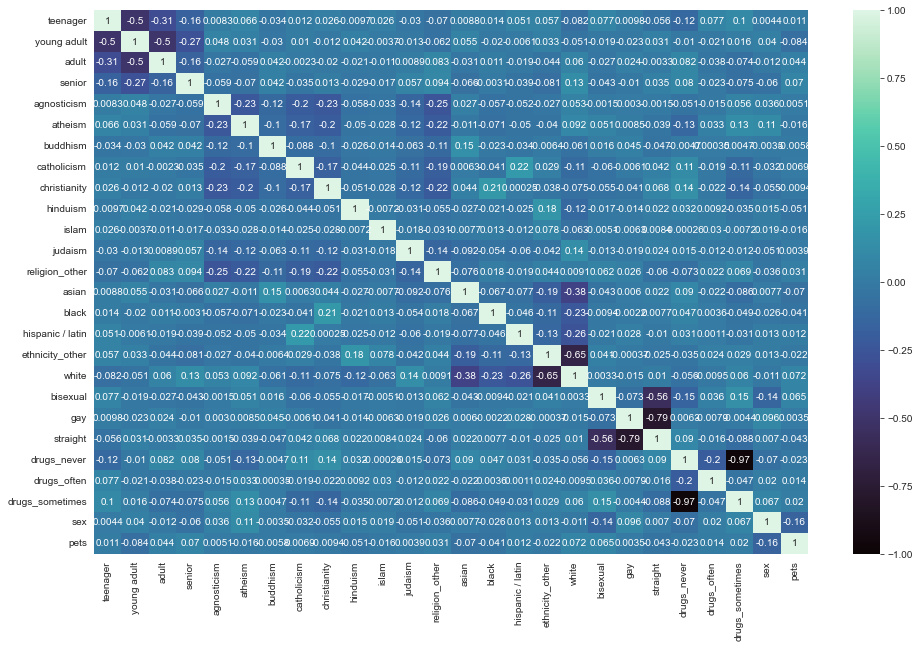

In [73]:
# Analysing correlations
plt.figure(figsize = (16,10))
data_class_corr = data_class.corr()
corrplot = sns.heatmap(data_class_corr, vmin = -1, vmax = 1, cmap = 'mako', annot = True)

***

## 5) Deriving Machine Learning Models

***

### Problem 1: Attempting regression model for predicting income

In [74]:
# Normalizing variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
mmscaler = MinMaxScaler()

# Standardizing Income and Age
df_inc_age = pd.DataFrame(stdscaler.fit_transform(data_income[['income','age']]), columns = ['income','age'])

# Normalizing Education
df_edu = pd.DataFrame(mmscaler.fit_transform(data_income[['education']]), columns = ['education'])

# Joining dataframes
data_model = df_inc_age.join(df_edu.join(data_income['job_stem'])).reset_index()
print(data_model.head())

# Removing NaNs and Infinites
data_model = data_model[np.isfinite(data_model).all(1)]

   index    income       age  education  job_stem
0      0  0.533415  0.171083       0.00         0
1      1 -0.568020 -0.541707       0.50         0
2      2 -0.843378 -0.338053       0.00         0
3      3 -0.292661 -0.439880       0.25         0
4      4 -0.017303  0.680220       0.50         0


In [75]:
# Deriving Multiple Linear Regressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

mlr = LinearRegression()

X = data_model[['age','education','job_stem']]
y = data_model[['income']]

# Data split between train and test (job categories)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 17)

# Fitting, Predictions and Scores
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
print(mlr.coef_)
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

[[0.24344696 1.14381773 0.67613981]]
0.2669563318549326
0.2660093099974066


<div class="alert alert-block alert-warning">
    The problem of predicting income based on some selected variables did not have an adequate solution based on the present data. The spread in income data (maybe a large portion of if is fake) and the poor correlations with other data didn't allow for a robust predictive model. Maybe performing PCA would help with the task, but instead another regression problem was chosen.
</div>

***

### Alternate Regression Problem: A regression model for predicting age (with and wihout PCA analysis)

### Simple Multiple Linear Regression Model without PCA Analysis

In [76]:
# Selecting Data for Model
X = data_alt[['income','offspring_has','drinks','offspring_wants','status','drugs','smokes','orientation']]
y = data_alt['age']

# Spliting data for Linear Model Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

# Fitting Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Score
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

0.41104265711833354
0.4122152163220504


<div class="alert alert-block alert-warning">
    A simple, multiple linear regressor for predicting age was fitted and its accuracy obtained. Both train and test accuracies are similar and near 40%, which is not a robust predictor. In the following section, a new model will be fitted but based on principal components derived by a PCA analysis. Let's see if it can improve the accuracy of predictions.
</div>

### Trying Another Regression Algorithm - Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

# Mean Absolute Error
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)
mae_train = np.mean((y_pred_train - y_train) ** 2)
mae_test = np.mean((y_pred_test - y_test) ** 2)
print(mae_train)
print(mae_test)

0.6152037955326177
0.3803053034633921
51.94854830819136
82.44917594922701


<div class="alert alert-block alert-warning">
    Applying a Random Forest Regressor the training results get better but test results get worse, indicating that the algorithm is overfitting the data. We could try to adjust the hyperparameters in order to get better results, but this is not the focus of this work.
</div>

***

### Applying PCA analysis and Using its Principal Components to Feed Linear Model as an Exercise

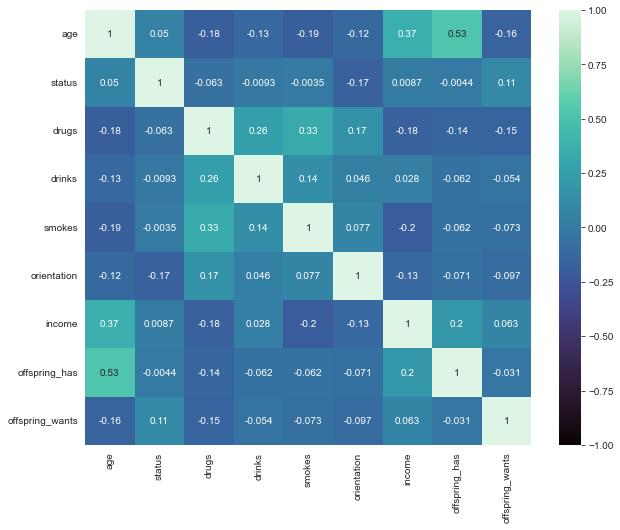

[2.10219977 1.38853223 0.38787859 1.13434163 0.99050883 0.62099182
 0.69709331 0.81198761 0.8664662 ]


In [78]:
# Investigating correlation matrix for PCA analysis
correlation_matrix = data_alt.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap='mako', annot = True)
plt.show()

# Deriving eigenvectors and eigenvalues - Information Gain analysis
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(eigenvalues)

[0.23357775 0.15428136 0.12603796 0.11005654 0.09627402 0.09022085
 0.07745481 0.06899909 0.04309762]


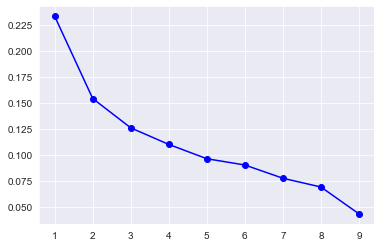

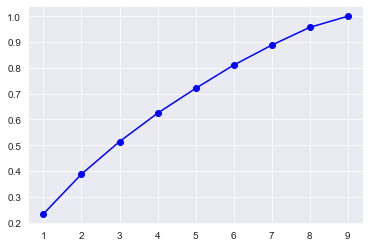

In [79]:
# Information graph
info_prop = eigenvalues / eigenvalues.sum()
info_prop = np.sort(info_prop)[::-1]
print(info_prop)

plt.plot(np.arange(1,len(info_prop)+1), info_prop, 'bo-')
plt.show()
plt.clf()

cum_info_prop = np.cumsum(info_prop)
plt.plot(np.arange(1,len(info_prop)+1), cum_info_prop, 'bo-')
plt.show()

In [80]:
# Implementing PCA using scikit.learn
from sklearn.decomposition import PCA

data_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733 entries, 1 to 39711
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               3733 non-null   int64   
 1   status            3733 non-null   int64   
 2   drugs             3733 non-null   float64 
 3   drinks            3733 non-null   float64 
 4   offspring         3733 non-null   object  
 5   smokes            3733 non-null   float64 
 6   orientation       3733 non-null   int64   
 7   income            3733 non-null   int64   
 8   offspring_status  3733 non-null   object  
 9   offspring_has     3733 non-null   int64   
 10  offspring_wants   3733 non-null   int64   
 11  age_bin           3733 non-null   category
dtypes: category(1), float64(3), int64(6), object(2)
memory usage: 482.9+ KB


In [81]:
# Selecting Variables
data_pca = data_alt[['age','status','drinks','drugs', 'offspring_has','smokes','income']]

# Removing NaNs and Infinites
data_pca = data_pca[np.isfinite(data_pca).all(1)]

# Standardizing data
mean = data_pca.mean(axis=0)
sttd = data_pca.std(axis=0)
data_standardized = (data_pca - mean) / sttd

# Applying PCA
pca = PCA()
components = pca.fit(data_standardized).components_
components = pd.DataFrame(components).transpose()
components.index =  data_pca.columns
print(components)

# Proportion of Variance
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

# Allowing all components
pca = PCA(n_components = 7)
 
# transform the data using the first 3 PCs
data_pcomp = pca.fit_transform(data_standardized)
 
# transform into a dataframe
data_pcomp = pd.DataFrame(data_pcomp)
 
# rename columns
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
 
# print the transformed data
print(data_pcomp.head())

                      0         1         2         3         4         5  \
age           -0.538970  0.329509 -0.043113  0.162572 -0.018212 -0.192288   
status        -0.055117 -0.087366 -0.986086 -0.047517 -0.010882 -0.095355   
drinks         0.230803  0.507168 -0.063178 -0.617382 -0.439165  0.301551   
drugs          0.399075  0.478847  0.014485  0.072810  0.091637 -0.761167   
offspring_has -0.441757  0.425531  0.003676  0.375273 -0.367639  0.129651   
smokes         0.361845  0.404675 -0.141602  0.435659  0.461286  0.516434   
income        -0.409710  0.228993  0.038865 -0.504205  0.671076  0.010554   

                      6  
age            0.731670  
status        -0.074132  
drinks         0.143386  
drugs         -0.134763  
offspring_has -0.575294  
smokes         0.126359  
income        -0.271133  
          0         1         2         3         4         5         6
0  0.290743  0.175724  0.143095  0.138112  0.100174  0.092467  0.059685
        PC1       PC2       PC3

<Figure size 720x720 with 0 Axes>

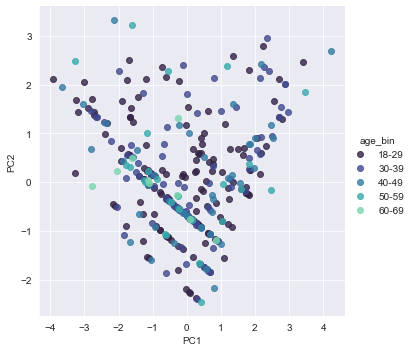

In [82]:
# Plotting data projected on principal components
data_plot = data_pcomp.join(data_alt['age_bin'])
plt.figure(figsize = (10,10))
sns.lmplot(x='PC1', y='PC2', data=data_plot, hue = 'age_bin', fit_reg=False, palette = 'mako')
plt.show()

In [83]:
# Using 3 principal components to train and test a linear model

# Selecting components
components = data_pcomp[['PC1','PC2']]
labels = data_pca[['age']]

# Data Split
X_train, X_test, y_train, y_test = train_test_split(components, labels, test_size = 0.3, random_state = 7)

# Fitting Linear Model
mlr_pca = LinearRegression()
mlr_pca.fit(X_train, y_train)
print(mlr_pca.score(X_train, y_train))
print(mlr_pca.score(X_test, y_test))

0.7232755233392305
0.7281138762106181


<div class="alert alert-block alert-warning">
    By using PCA analysis, we could substantially improve model accuracy (by up to more than 70%) by using only the first 2 principal components.
    The downside is that now we can't direct correlate the variables which help predict age the most, since the principal components are combinations of them.
</div>

***

### Problem 2: Applying Decision Trees, Random Forests and SVMs to predict Availability Status

<div class="alert alert-block alert-warning">
    Before we  apply any machine learning model, we need to balance the high unbalanced class which is status (with the vast majority being single, as expected from a dating app).
</div>

In [84]:
# Upsampling Minority Classes and DownSampling Majority Ones
from sklearn.utils import resample
data_class_major = data_class[data_class['available'] == 'Yes']
data_class_minor = data_class[data_class['available'] == 'No']

# DownSampling Majority Class to 10000 samples
data_major_dnsample = resample(data_class_major, replace = False, n_samples = 10000, random_state = 87)

# UpSampling Minority Class to 10000 samples
data_minor_upsample = resample(data_class_minor, replace = True, n_samples = 10000, random_state = 47)

# Combining results in new DataFrame
data_class_balanced = pd.concat([data_major_dnsample, data_minor_upsample])
data_class_balanced['available'].value_counts()

Yes    10000
No     10000
Name: available, dtype: int64

In [105]:
# Importing Packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X = data_class_balanced.drop(columns = 'available')
y = data_class_balanced['available'].apply(lambda x: 0 if str(x) == 'No' else 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=47, test_size=0.2)

dtree = DecisionTreeClassifier(max_depth = 5, criterion = 'gini')

dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.60475
F1 score: 0.6436781609195402
Precision score: 0.5842880523731587
Recall score: 0.7165077772202709
Confusion Matrix: 
[[ 991 1016]
 [ 565 1428]]


<div class="alert alert-block alert-warning">
    After balancing classes (available / not available), we trained a decision tree model and its predictive accuracy reached 60%. We will try to use strategies to enhance this accuracy (RandomForestClassifier).
</div>

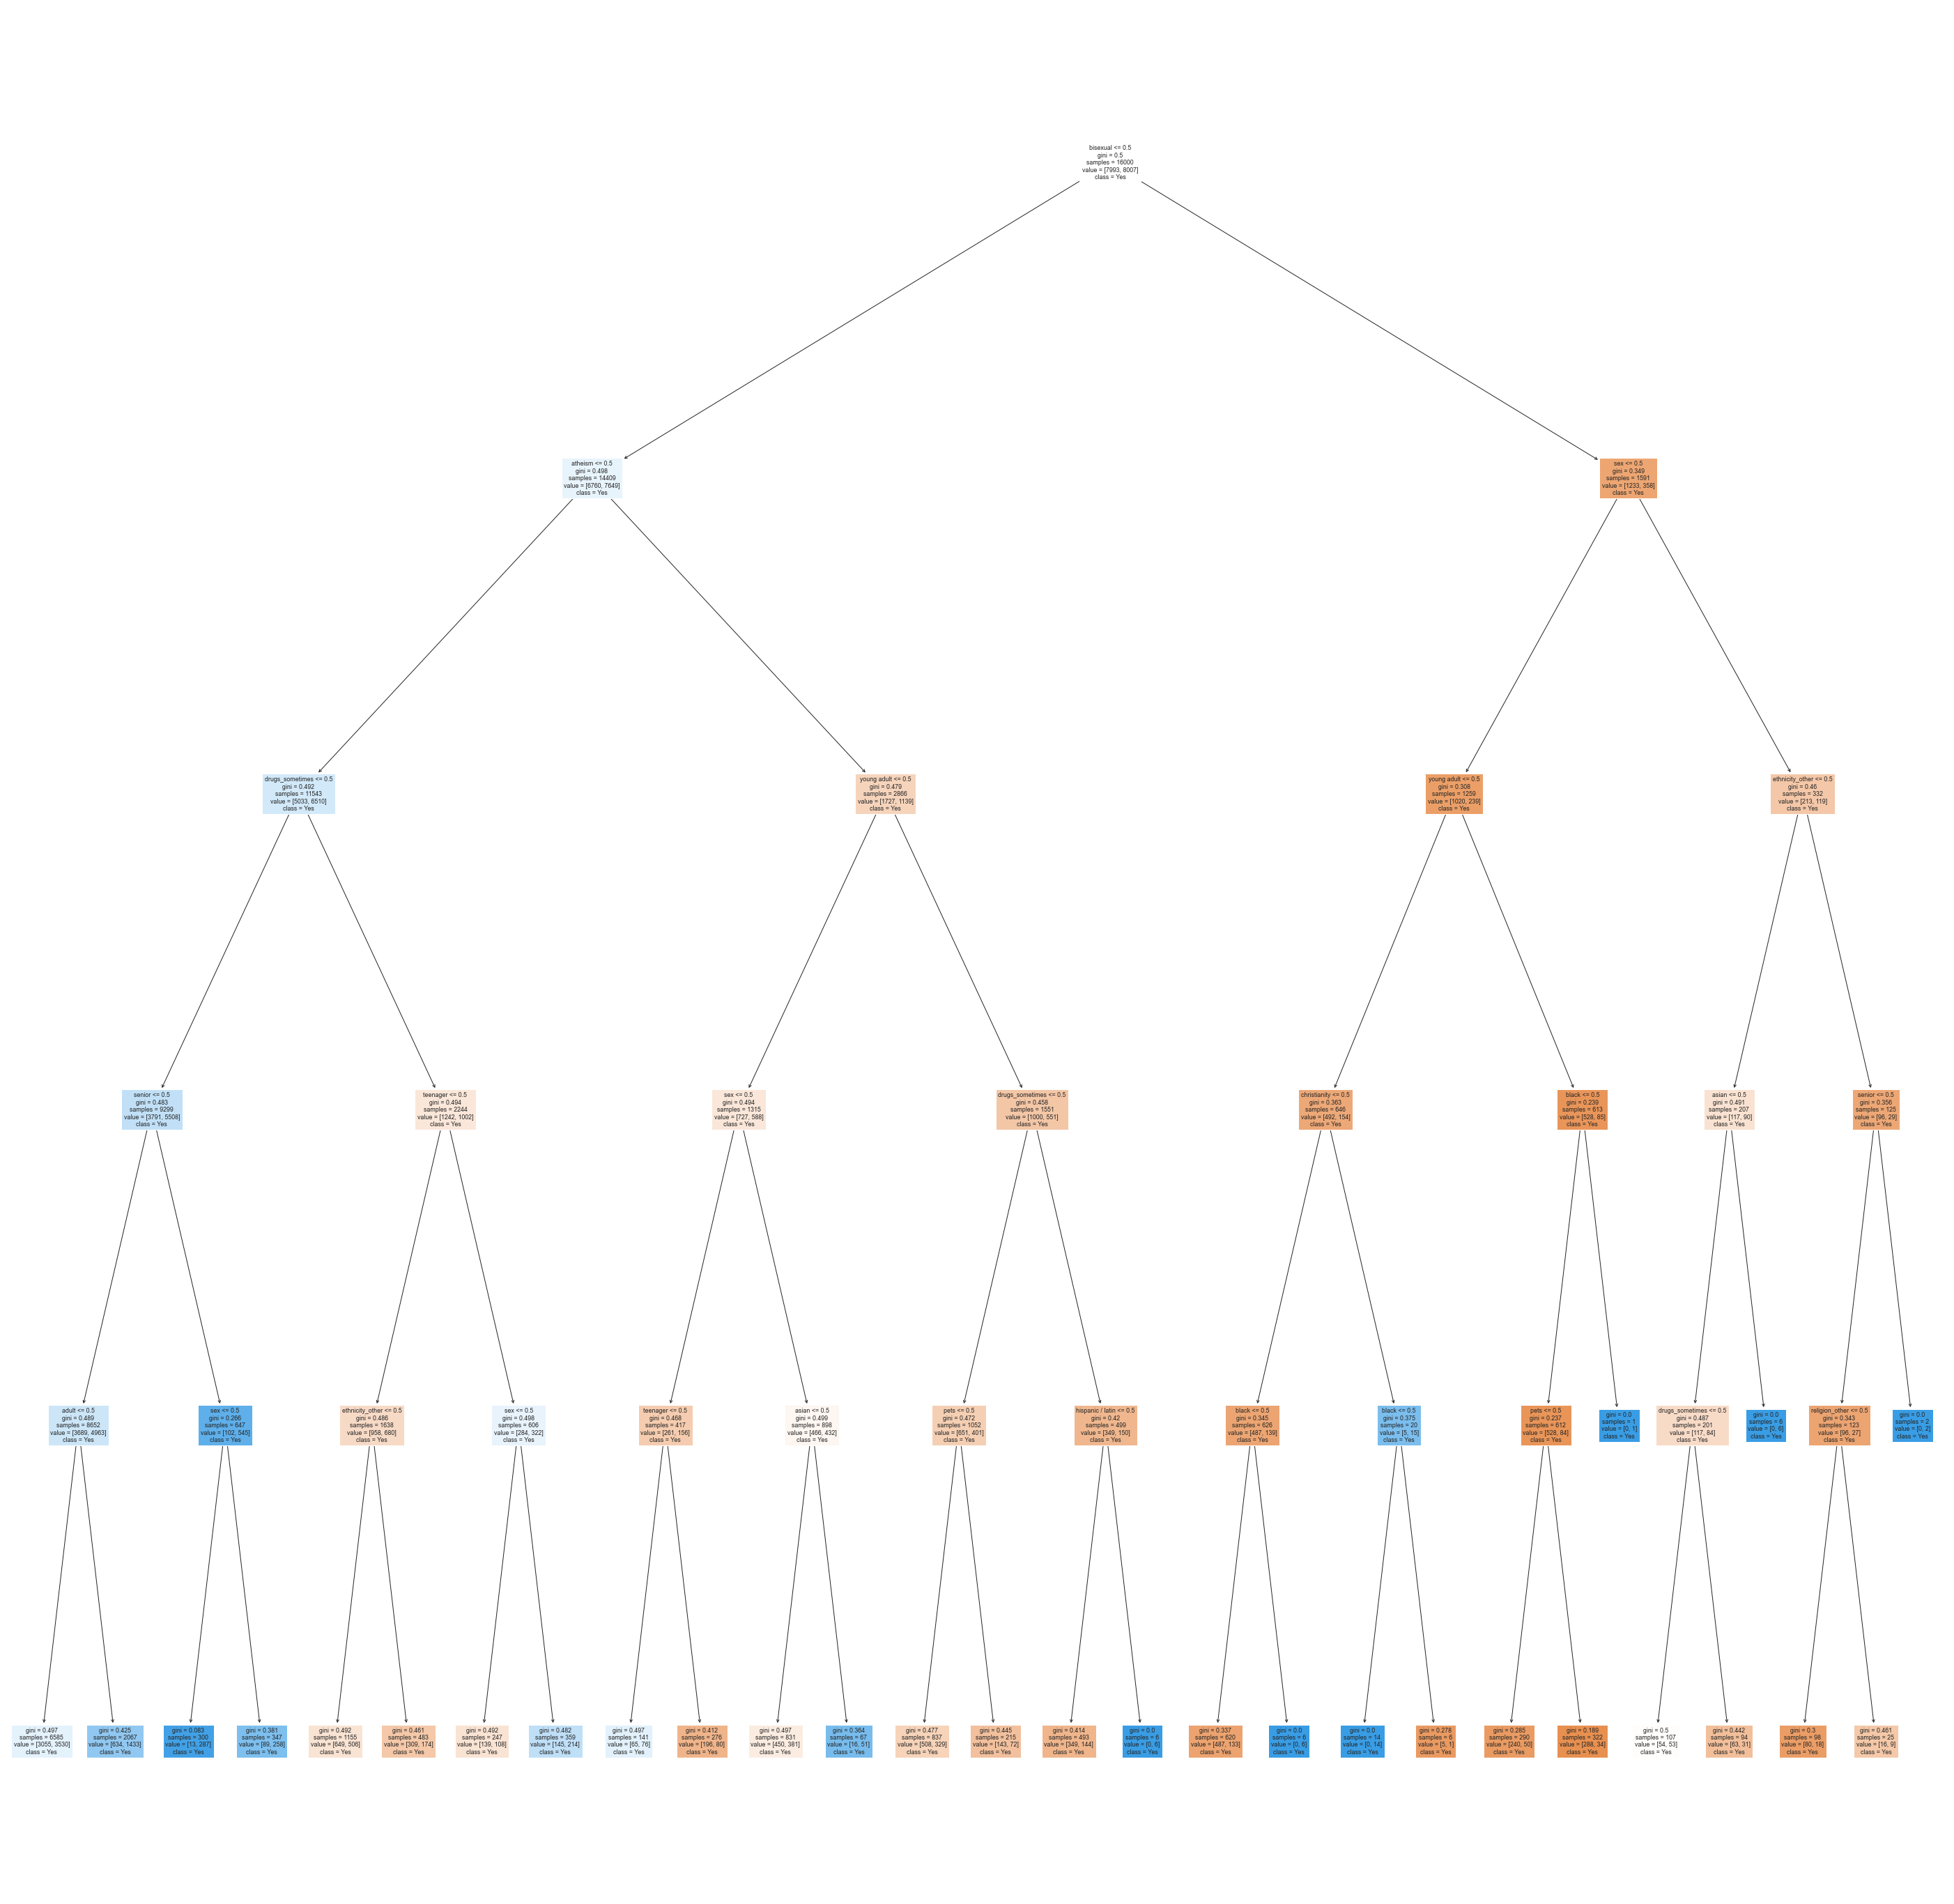

<Figure size 432x288 with 0 Axes>

In [86]:
# Visualizing the Tree
plt.figure(figsize = (50,50))
tree.plot_tree(dtree, feature_names = X_train.columns, class_names = data_2['available'].values, filled = True)
plt.show()
plt.clf()

[0.02968597 0.02305199 0.09808568 0.11269079 0.         0.16068574
 0.         0.         0.01362825 0.         0.         0.
 0.00156232 0.01931271 0.01848219 0.00749426 0.01329175 0.
 0.33808579 0.         0.         0.         0.         0.10594597
 0.05481667 0.00317992]


C:\Users\rafab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

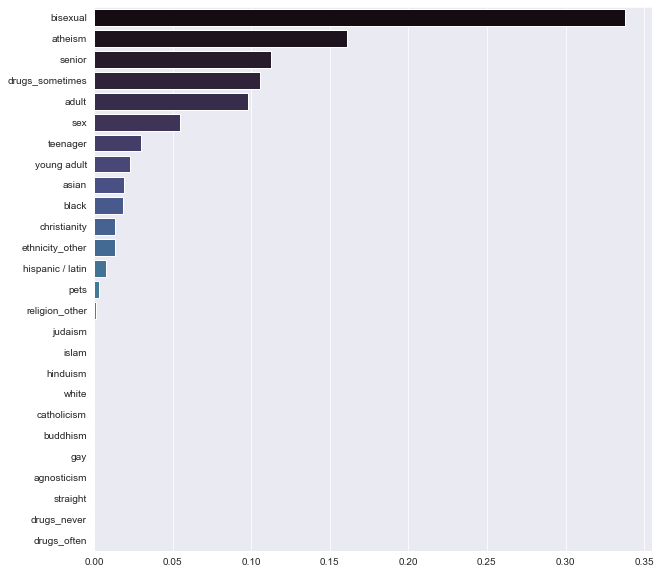

In [87]:
# Feature Importance
feature_importances = dtree.feature_importances_
print(feature_importances)

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns.values[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize = (10,10))
sns.barplot(sorted_importances, sorted_feature_names, palette = 'mako')

<div class="alert alert-block alert-warning">
    From the feature importances plot we can conclude that some features have greater impact on classifying status. The most important ones are orientation (bissexual, with overwhelming importance), followed by drug usage (sometimes), followed by age (youngsters or teenagers) and  religion (atheism). These features will dictate which ones will be chosen for applying to SVM in the next section.
</div>

***

### Trying to Enhance Model's Predictive Accuracy - Varying Tree Depths and Number of Estimators

<div class="alert alert-block alert-warning">
    Now we apply random forest techniques to try to enhance our accuracy results.
</div>

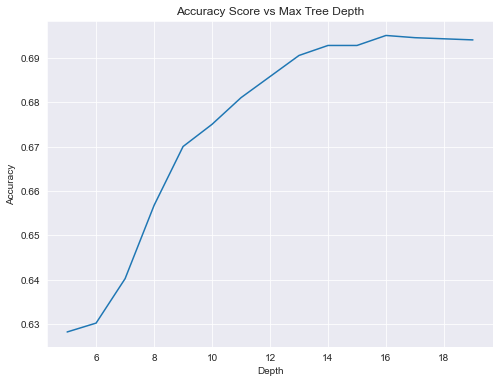

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Seraching for the optimum tree depth
scores = []
depths = []
for depth in range(5, 20):   
    depths.append(depth)
    rfc = RandomForestClassifier(max_depth = depth, criterion = 'gini', random_state = 107)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    scores.append(score)

plt.figure(figsize = (8,6))
plt.plot(depths, scores)
plt.title('Accuracy Score vs Max Tree Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

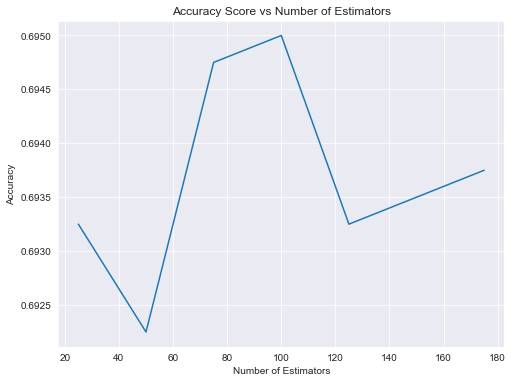

In [89]:
# Searching for the optimum number of estimators (trees)
scores = []
estimators = []
for n in range(25, 200, 25):   
    estimators.append(n)
    rfc = RandomForestClassifier(max_depth = 16, criterion = 'gini', n_estimators = n, random_state = 107)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    scores.append(score)

plt.figure(figsize = (8,6))
plt.plot(estimators, scores)
plt.title('Accuracy Score vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

<div class="alert alert-block alert-warning">
    The method is insensitive to the number of estimators, but the accuracy can reasonably improve with greater tree depths (up to the optimum point which is around 16 levels). We now take this optimum values as parameters to calculate evaluation metrics. 
</div>

In [90]:
# Evaluation Metrics
rfc = RandomForestClassifier(max_depth = 16, criterion = 'gini', random_state = 107)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.695
F1 score: 0.6852425180598554
Precision score: 0.7052575677110993
Recall score: 0.6663321625689914
Confusion Matrix: 
[[1452  555]
 [ 665 1328]]


<div class="alert alert-block alert-warning">
    Appplying a Random Forest Classifier with tuned parameters, it was possible to achieve near 70% of accuracy in classifying relationship status (availability).
</div>

***

### Question: can we predict availability based on fewer features still maintaining or even improving accuracy scores? We will try to answer this question applying another kind of classification algorithm, Support Vector Machines

In [97]:
from sklearn.svm import SVC

# Feature Selection - Based on Previously Calculated Feature Importance - Top 10 most important features
data_svc = data_class_balanced[['available','bisexual','atheism','senior','drugs_sometimes','adult','sex','teenager','young adult','asian','black']]

X = data_svc.drop(columns = 'available')
y = data_svc['available'].apply(lambda x: 0 if str(x) == 'No' else 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=47, test_size=0.2)

# Fitting Models variating Hyperparameters Gamma and C

scores = {}
gammac = []
for gamma in np.logspace(-3,2,6).tolist():
    for c in np.logspace(-3,2,6).tolist():
        gammac.append((gamma,c))
        svm = SVC(gamma = gamma, C = c)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        scores[(gamma,c)] = score

gammas = [x[0] for x in scores.keys()]
cs = [x[1] for x in scores.keys()]
scores = list(scores.values())

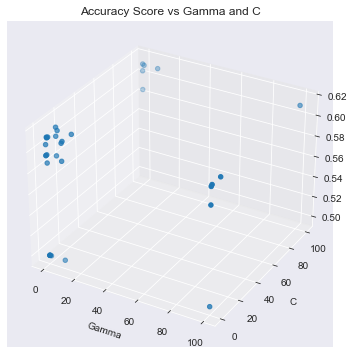

Best Accuracy Score: 0.61425
Best Gamma: 0.1
Best C: 10.0


<Figure size 432x288 with 0 Axes>

In [103]:
# 3D Plot
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(projection = '3d')
ax.scatter(gammas, cs , scores)
plt.title('Accuracy Score vs Gamma and C')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

plt.show()
plt.clf()

# Best Combination for (Gamma, C)
best_score = max(scores)
best_index = scores.index(best_score)
best_gamma = gammas[best_index]
best_C = cs[best_index]

print(f'Best Accuracy Score: {best_score}' )
print(f'Best Gamma: {best_gamma}' )
print(f'Best C: {best_C}' )

In [104]:
# Applying best parameters and calculating Scores and Confusion Matrix
best_svc = SVC(gamma = best_gamma, C = best_C) 
best_svc.fit(X_train, y_train)
y_pred = best_svc.predict(X_test)


print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.61425
F1 score: 0.646991535117822
Precision score: 0.5946173254835997
Recall score: 0.7094831911690919
Confusion Matrix: 
[[1043  964]
 [ 579 1414]]


<div class="alert alert-block alert-warning">
    Comparing both methods (Random Forests and Support Vector Machines), which were tuned according to their relevant hyperparameters, to the single Decision Tree method, we can conclude that they were able to enhance prediction scores. 
    Random Forest Method, when properly tunned, significantly increase the overall prediction accuracy from near 60% to near 70%, compared to a single Decision Tree. In particular, this method significantly improved precision score.
    SVM method did not significantly improved overall accuracy over a single decision tree, even with hyperparameter tunning.
</div>

***

## 6) Conclusions

#### Reviewing the steps taken during the development of this project:
* Date App Users Data was loaded and inspected
* Data Summary Statistics were calculated
* Some questions were formulated by the author, and from there the objectives were to explore two different prediction models, a regression one and a classification one
* Data Cleaning was performed, NaNs droped, outliers taken care of, transformations and binning carried out
* Pairplots and Correlation Matrices used to detect interesting features for models
* Data was further manipulated to fit model's requirements
* Different machine learning models were built
* Hyperparameter tunning carried out
* Scores calculated and compared

#### In the author's view, the main conclusions and takeaways from this project are:
* Data provided by the course was rich and dense, contributing to a lot of ideas and data exploration paths and motivating curiosity; 
* A lot of the Data Science course content could be covered during this work, which contributed a lot to the learning curve of the author;
* Regression predictive models (like the ones chosen and motivated by the initial questions) did not provide good predictive results. From the pairplots and correlation matrices it was clear that it would be a difficult task, nevertheless they were carried out and contributed a lot to author's learning. PCA analysis was also carried out as an extra exercise. These results show us how diverse people are (even when mostly concentrated in one single american state, California), and how difficult it is to predict people's behaviour and habits; 
* Classification predictive models performed better with this data than regression ones. It was possible to achieve an overall 70% accuracy in relationship availability status when applying a Random Forest Classifier with tuned hyperparameters. Even though, 70% classification is not a very good figure, just reinforcing what was said above, that it is difficult to capture the diversity of people;
* These conclusions are majorly based on the author's choice of features. Maybe filtering features in a different way would change some of the conclusions;
    
#### Main Data Science Concepts explored during this work:
* Data loading, DataFrames with Pandas
* Data Cleaning, Tidying
* Data Manipulation with Pandas and Numpy
* Summary Statistics
* Different Data Visualization Techniques and Graphs, Plots with MatPlotLib and Seaborn packages
* Data Transformations
* Exploratory Data Analysis
* Machine Learning Models and Analysis with ScikitLearn package: Single and Multiple Linaer Regressors, Decision Trees, Random Forest Classifier, Support Vector Machine, Pricipal Component Analysis
* Evaluation Metrics